In [303]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [304]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize
import cv2

In [305]:
def show_data(images, prediction = False):
    if prediction:
      print("No tu bedziemy jeszcze obok pokazywac zgadl")
    else:
      plt.figure(figsize=(8, 4))
      for i in range(len(images.data)):
          plt.subplot(2, 5, i+1)
          plt.imshow(images.data[i])
          plt.xticks([])
          plt.yticks([])
          plt.draw()
      
      plt.figure(figsize=(8, 4))
      for i in range(len(images.test_data)):
          plt.subplot(2, 5, i+1)
          plt.imshow(images.test_data[i].reshape(128,128))
          plt.xticks([])
          plt.yticks([])
          plt.draw()
    plt.show()

In [306]:
class Data():
    def __init__(self):
        self.data = []
        self.train_data = []
        self.test_data = []
  
    def prepare_data(self):
        square = get_image('/content/gdrive/MyDrive/test/square/101.png')
        circle = get_image('/content/gdrive/MyDrive/test/circle/101.png')
        triangle = get_image('/content/gdrive/MyDrive/test/triangle/101.png')
        star = get_image('/content/gdrive/MyDrive/test/star/101.png')
        self.data = [square, circle, triangle, star]

    def prepare_train_data(self):
        for image in self.data:
            image = resize(image, (128,128), mode = 'reflect')

            thresh = threshold_mean(image)
            binary = image > thresh
            binary_int = 2*(binary*1)-1

            ready = np.reshape(binary_int, (128*128))
            self.train_data.append(ready)

    def prepare_test_data(self):
        for image in self.train_data:
            destroyed_image = image.copy()
            n = len(image)
            num_pixels = 0.5 * n
            for _ in range (int(num_pixels)):
                random = np.random.randint(0, n-1)
                destroyed_image[random] = -1*image[random]
              # corrupted[random] = 10 #w takiej opcji nie zadziała
            self.test_data.append(destroyed_image)


    


def get_image(path):
    image = rgb2gray(cv2.imread(path))
    return image


In [307]:
def main(): 
    images = Data()
    images.prepare_data()
    images.prepare_train_data()
    images.prepare_test_data()
    show_data(images)

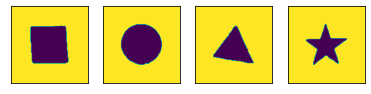

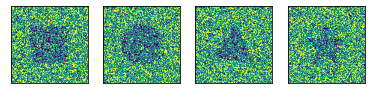

In [308]:
main()